# Name: Dhananjay wagh

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

# 1. Problem Statement

Predict the price of House using various variable

# 2. Data Gathering

In [2]:
df=pd.read_csv('Pune_House_Data-Copy1.csv')
df.head(10)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
5,Super built-up Area,Ready To Move,2 BHK,DuenaTa,1170,2.0,1.0,38.00,Balaji Nagar
6,Super built-up Area,18-May,4 BHK,Jaades,2732,4.0,NaN,204.00,Baner
7,Super built-up Area,Ready To Move,4 BHK,Brway G,3300,4.0,NaN,600.00,Baner road
8,Super built-up Area,Ready To Move,3 BHK,NaN,1310,3.0,1.0,63.25,Bhandarkar Road
9,Plot Area,Ready To Move,6 Bedroom,NaN,1020,6.0,NaN,370.00,Bhavani Peth


In [47]:
df['site_location'].nunique()

97

In [3]:
df.isna().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [4]:
df.drop('society',axis=1,inplace=True)

In [5]:
df['bath']=df['bath'].fillna(df['bath'].mean())
df['balcony']=df['balcony'].fillna(df['balcony'].mean())
df['size']=df['size'].fillna('2 BHK')
df.isna().sum()

area_type        0
availability     0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    1
dtype: int64

In [6]:
df['BHK']=df['size'].str.split().str.get(0).astype(int)
df['BHK']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: BHK, Length: 13320, dtype: int32

In [7]:
df.describe()

,bath,balcony,price,BHK
count,13320.000000,13320.000000,13320.000000,13320.000000
mean,2.692610,1.584376,112.565627,2.802778
std,1.337777,0.798360,148.971674,1.294496
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000
50%,2.000000,2.000000,72.000000,3.000000
75%,3.000000,2.000000,120.000000,3.000000
max,40.000000,3.000000,3600.000000,43.000000


In [8]:
BHK=df['BHK']

<AxesSubplot:xlabel='BHK', ylabel='Density'>

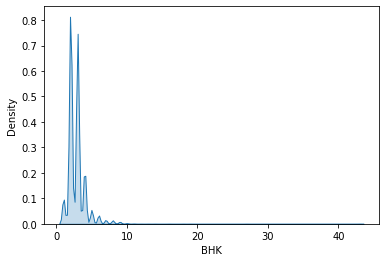

In [9]:
sns.kdeplot(BHK,fill=True)

<AxesSubplot:xlabel='BHK'>

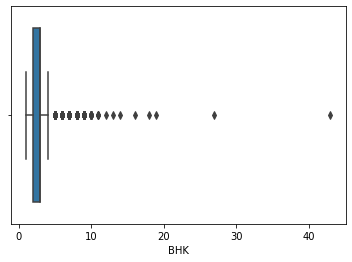

In [10]:
sns.boxplot(BHK)       #outlier

In [11]:
#fill outlier by using mean,median,or mode
q1 = df["BHK"].quantile(0.25)
q2 = df["BHK"].quantile(0.50)
q3 = df["BHK"].quantile(0.75)
print(f'q1 == {q1}, q2 == {q2}, q3 == {q3}')

iqr = q3 - q1
print('IQR is ',iqr)

q1 == 2.0, q2 == 3.0, q3 == 3.0
IQR is  1.0


In [12]:
lower_tail = q1 - 3*iqr
upper_tail = q3 + 2.5*iqr

print(f'Lower Tail == {lower_tail}')
print(f'Upper Tail == {upper_tail}')

Lower Tail == -1.0
Upper Tail == 5.5


In [13]:
df.loc[(df['BHK'] > upper_tail)]


,area_type,availability,size,total_sqft,bath,balcony,price,site_location,BHK
9,Plot Area,Ready To Move,6 Bedroom,1020,6.0,1.584376,370.0,Bhavani Peth,6
45,Plot Area,Ready To Move,8 Bedroom,600,9.0,1.584376,200.0,Kondhwa Budruk,8
58,Plot Area,Ready To Move,6 Bedroom,1407,4.0,1.000000,150.0,Mundhawa,6
64,Built-up Area,Ready To Move,8 Bedroom,3000,8.0,0.000000,140.0,Padmavati,8
68,Plot Area,Ready To Move,8 Bedroom,1350,7.0,0.000000,85.0,Pirangut,8
...,...,...,...,...,...,...,...,...,...
13221,Plot Area,Ready To Move,9 Bedroom,1178,9.0,1.000000,75.0,Pirangut,9
13226,Built-up Area,Ready To Move,8 Bedroom,6000,8.0,3.000000,215.0,Sadashiv Peth,8
13277,Plot Area,Ready To Move,7 Bedroom,1400,7.0,1.584376,218.0,Ghorpadi,7
13279,Plot Area,Ready To Move,6 Bedroom,1200,5.0,1.584376,130.0,Gultekdi,6


In [14]:
outlier_indices=df.loc[(df['BHK'] > upper_tail)].index
outlier_indices

Int64Index([    9,    45,    58,    64,    68,    79,    85,    89,   129,
              140,
            ...
            13187, 13198, 13200, 13217, 13219, 13221, 13226, 13277, 13279,
            13311],
           dtype='int64', length=490)

In [15]:
print('Mean before removing outliers =',df['BHK'].mean())
mean_BHK = df.loc[df['BHK'] < upper_tail, 'BHK'].mean()
print('Mean without outlier  =',mean_BHK)
df['BHK'].loc[df['BHK'] > upper_tail] = np.ceil(mean_BHK)
print('Mean after removing outliers',df['BHK'].mean())

Mean before removing outliers = 2.8027777777777776
Mean without outlier  = 2.6315666406858926
Mean after removing outliers 2.64512012012012


In [16]:
df1=df.drop(['availability','balcony','size'],axis='columns')
df1

,area_type,total_sqft,bath,price,site_location,BHK
0,Super built-up Area,1056,2.0,39.07,Alandi Road,2
1,Plot Area,2600,5.0,120.00,Ambegaon Budruk,4
2,Built-up Area,1440,2.0,62.00,Anandnagar,3
3,Super built-up Area,1521,3.0,95.00,Aundh,3
4,Super built-up Area,1200,2.0,51.00,Aundh Road,2
...,...,...,...,...,...,...
13315,Built-up Area,3453,4.0,231.00,Pashan,5
13316,Super built-up Area,3600,5.0,400.00,Paud Road,4
13317,Built-up Area,1141,2.0,60.00,Pirangut,2
13318,Super built-up Area,4689,4.0,488.00,Prabhat Road,4


In [17]:
df1.isna().sum()

area_type        0
total_sqft       0
bath             0
price            0
site_location    1
BHK              0
dtype: int64

In [18]:
def pair_number(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df1[~df1['total_sqft'].apply(pair_number)].head(10)

,area_type,total_sqft,bath,price,site_location,BHK
30,Super built-up Area,2100 - 2850,4.00000,186.000,Gultekdi,4
56,Built-up Area,3010 - 3410,2.69261,192.000,Model colony,4
81,Built-up Area,2957 - 3450,2.69261,224.500,Shukrawar Peth,4
122,Super built-up Area,3067 - 8156,4.00000,477.000,Ganeshkhind,4
137,Super built-up Area,1042 - 1105,2.00000,54.005,Khadaki,2
165,Super built-up Area,1145 - 1340,2.00000,43.490,Prabhat Road,2
188,Super built-up Area,1015 - 1540,2.00000,56.800,Wakadewadi,2
224,Super built-up Area,1520 - 1740,2.69261,74.820,Hadapsar,3
410,Super built-up Area,34.46Sq. Meter,1.00000,18.500,Ganeshkhind,1
549,Super built-up Area,1195 - 1440,2.00000,63.770,Prabhat Road,2


In [20]:
def convert_sqrt_to_number(x):
    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
df2 = df1.copy()
df2['total_sqft'] =df2['total_sqft'].apply(convert_sqrt_to_number)
df2.loc[410]

area_type        Super built-up  Area
total_sqft                        NaN
bath                              1.0
price                            18.5
site_location             Ganeshkhind
BHK                                 1
Name: 410, dtype: object

In [22]:
df2['total_sqft']=df2['total_sqft'].fillna(df2['total_sqft'].median())
df2.loc[410]

area_type        Super built-up  Area
total_sqft                     1276.0
bath                              1.0
price                            18.5
site_location             Ganeshkhind
BHK                                 1
Name: 410, dtype: object

In [23]:
df2.isna().sum()

area_type        0
total_sqft       0
bath             0
price            0
site_location    1
BHK              0
dtype: int64

In [24]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,area_type,total_sqft,bath,price,site_location,BHK,price_per_sqft
0,Super built-up Area,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,Plot Area,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,Built-up Area,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,Super built-up Area,1521.0,3.0,95.00,Aundh,3,6245.890861
4,Super built-up Area,1200.0,2.0,51.00,Aundh Road,2,4250.000000


In [25]:
df3.to_csv('clean_house_data.csv',index=False)

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13320 non-null  object 
 1   total_sqft      13320 non-null  float64
 2   bath            13320 non-null  float64
 3   price           13320 non-null  float64
 4   site_location   13319 non-null  object 
 5   BHK             13320 non-null  int32  
 6   price_per_sqft  13320 non-null  float64
dtypes: float64(4), int32(1), object(2)
memory usage: 676.5+ KB


In [27]:
df3['site_location'].value_counts()

Alandi Road            139
Kalyani Nagar          139
Mahatma Gandhi Road    139
Lulla Nagar            139
Laxmi Road             139
                      ... 
Sadashiv Peth          138
Raviwar Peth           138
Rasta Peth             138
Ghorpadi               138
other                    1
Name: site_location, Length: 97, dtype: int64

In [28]:
df3[df3['total_sqft']/df3['BHK']<300]

,area_type,total_sqft,bath,price,site_location,BHK,price_per_sqft
45,Plot Area,600.0,9.0,200.0,Kondhwa Budruk,3,33333.333333
70,Plot Area,500.0,3.0,100.0,Pune Railway Station,3,20000.000000
78,Built-up Area,460.0,1.0,22.0,Senapati Bapat Road,2,4782.608696
89,Plot Area,710.0,6.0,160.0,Viman Nagar,3,22535.211268
119,Plot Area,276.0,3.0,23.0,Fatima Nagar,2,8333.333333
...,...,...,...,...,...,...,...
13112,Plot Area,440.0,3.0,35.0,Market yard,3,7954.545455
13190,Plot Area,1330.0,5.0,210.0,Karve Nagar,5,15789.473684
13216,Super built-up Area,250.0,2.0,40.0,Navi Peth,1,16000.000000
13281,Plot Area,1375.0,5.0,125.0,Hadapsar,5,9090.909091


In [29]:
df3.shape

(13320, 7)

In [30]:
df4=df3[~(df3['total_sqft']/df3['BHK']<300)]
df4.shape

(12803, 7)

In [31]:
df4['price_per_sqft'].describe()

count     12803.000000
mean       6458.868574
std        4342.186215
min         267.829813
25%        4230.769231
50%        5337.243402
75%        7041.302581
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
# #fill outlier by using mean,median,or mode
# q4 = df4["price_per_sqft"].quantile(0.25)
# q5 = df4["price_per_sqft"].quantile(0.50)
# q6 = df4["price_per_sqft"].quantile(0.75)
# print(f'q1 == {q4}, q2 == {q5}, q3 == {q6}')

# iqr = q6 - q4
# print('IQR is ',iqr)


In [33]:
# lower_tail = q1 - iqr
# upper_tail = q3 + iqr

# print(f'Lower Tail == {lower_tail}')
# print(f'Upper Tail == {upper_tail}')

In [34]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, new_df in df.groupby('site_location'):
        print(key)
        print(new_df)
        mean= np.mean(new_df['price_per_sqft'])
        std= np.std(new_df['price_per_sqft'])
        reduced_df = new_df[(new_df['price_per_sqft']>(mean-std)) & (new_df['price_per_sqft']<=(mean+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_outliers(df4)
df5.shape

Alandi Road
                  area_type  total_sqft  bath   price site_location  BHK  \
0      Super built-up  Area      1056.0   2.0   39.07   Alandi Road    2   
96               Plot  Area      2894.0   4.0  245.00   Alandi Road    4   
192              Plot  Area      1200.0   5.0  325.00   Alandi Road    4   
288    Super built-up  Area      1084.0   2.0   50.00   Alandi Road    2   
384          Built-up  Area      1000.0   2.0   25.00   Alandi Road    2   
...                     ...         ...   ...     ...           ...  ...   
12865  Super built-up  Area      1200.0   2.0   45.00   Alandi Road    2   
12961        Built-up  Area      1799.0   6.0  101.00   Alandi Road    3   
13057  Super built-up  Area      1600.0   3.0  260.00   Alandi Road    3   
13153  Super built-up  Area      1975.0   3.0   90.00   Alandi Road    3   
13249            Plot  Area      1200.0   2.0   75.00   Alandi Road    2   

       price_per_sqft  
0         3699.810606  
96        8465.791292  
192

Budhwar Peth
                  area_type  total_sqft  bath   price site_location  BHK  \
12     Super built-up  Area      1000.0   2.0   38.00  Budhwar Peth    2   
108          Built-up  Area       782.0   2.0   55.68  Budhwar Peth    2   
204          Built-up  Area      1260.0   2.0   54.00  Budhwar Peth    3   
300    Super built-up  Area      1863.0   3.0  104.00  Budhwar Peth    4   
396          Built-up  Area      1260.0   2.0   55.00  Budhwar Peth    2   
...                     ...         ...   ...     ...           ...  ...   
12781        Built-up  Area      1200.0   3.0   75.00  Budhwar Peth    3   
12877  Super built-up  Area      1305.0   2.0   67.00  Budhwar Peth    2   
13069  Super built-up  Area      1115.0   2.0   50.00  Budhwar Peth    2   
13165        Built-up  Area      1850.0   3.0   98.00  Budhwar Peth    3   
13261            Plot  Area      2000.0   2.0  360.00  Budhwar Peth    3   

       price_per_sqft  
12        3800.000000  
108       7120.204604  
20

Dhayari Phata
                  area_type  total_sqft  bath  price  site_location  BHK  \
20           Built-up  Area       600.0   1.0   15.0  Dhayari Phata    1   
116    Super built-up  Area      1540.0   2.0   64.0  Dhayari Phata    3   
212          Built-up  Area      1798.0   3.0   89.0  Dhayari Phata    3   
308    Super built-up  Area      1664.0   4.0   65.0  Dhayari Phata    4   
404    Super built-up  Area      1175.0   2.0   82.0  Dhayari Phata    2   
...                     ...         ...   ...    ...            ...  ...   
12885        Built-up  Area      3385.0   4.0  220.0  Dhayari Phata    4   
12981  Super built-up  Area      1510.0   2.0  110.0  Dhayari Phata    3   
13077  Super built-up  Area      1020.0   2.0   39.0  Dhayari Phata    2   
13173  Super built-up  Area      1295.0   2.0   62.0  Dhayari Phata    2   
13269            Plot  Area      2010.0   3.0  201.0  Dhayari Phata    3   

       price_per_sqft  
20        2500.000000  
116       4155.844156  
2

                  area_type  total_sqft  bath  price  site_location  BHK  \
29     Super built-up  Area     1025.00   2.0   47.0  Gokhale Nagar    3   
125          Built-up  Area     1050.00   2.0   34.0  Gokhale Nagar    2   
221    Super built-up  Area     1475.00   2.0   90.0  Gokhale Nagar    3   
317    Super built-up  Area     1280.00   2.0   75.0  Gokhale Nagar    2   
413              Plot  Area     1200.00   7.0  250.0  Gokhale Nagar    3   
...                     ...         ...   ...    ...            ...  ...   
12894        Built-up  Area      960.00   2.0   35.0  Gokhale Nagar    2   
12990  Super built-up  Area     2038.50   3.0  122.0  Gokhale Nagar    3   
13086  Super built-up  Area     5665.84   7.0  988.0  Gokhale Nagar    5   
13182  Super built-up  Area     1420.00   3.0   90.0  Gokhale Nagar    3   
13278        Built-up  Area     1256.00   2.0   65.0  Gokhale Nagar    2   

       price_per_sqft  
29        4585.365854  
125       3238.095238  
221       6101.

[130 rows x 7 columns]
Katraj
                  area_type  total_sqft  bath  price site_location  BHK  \
40           Built-up  Area      1296.0   2.0  81.00        Katraj    2   
136    Super built-up  Area      1360.0   2.0  65.00        Katraj    2   
232    Super built-up  Area      1110.0   2.0  55.00        Katraj    2   
328    Super built-up  Area      1200.0   2.0  52.00        Katraj    2   
424          Built-up  Area       985.0   2.0  67.00        Katraj    2   
...                     ...         ...   ...    ...           ...  ...   
12809  Super built-up  Area      1044.0   2.0  55.00        Katraj    2   
13001  Super built-up  Area      1016.0   2.0  39.95        Katraj    2   
13097  Super built-up  Area      1215.0   2.0  49.86        Katraj    3   
13193  Super built-up  Area      1000.0   2.0  50.00        Katraj    2   
13289  Super built-up  Area      1349.0   2.0  96.80        Katraj    2   

       price_per_sqft  
40        6250.000000  
136       4779.411765

Laxmi Road
                  area_type  total_sqft  bath   price site_location  BHK  \
50     Super built-up  Area      1270.0   2.0   50.00    Laxmi Road    2   
146    Super built-up  Area      1828.0   3.0  110.00    Laxmi Road    3   
242    Super built-up  Area       645.0   1.0   16.45    Laxmi Road    1   
338    Super built-up  Area      1600.0   3.0   64.00    Laxmi Road    3   
434              Plot  Area      1200.0   8.0  250.00    Laxmi Road    3   
...                     ...         ...   ...     ...           ...  ...   
12915  Super built-up  Area      1181.0   2.0   61.00    Laxmi Road    2   
13011  Super built-up  Area      1025.0   2.0   44.00    Laxmi Road    2   
13107  Super built-up  Area      1150.0   2.0   40.25    Laxmi Road    2   
13203  Super built-up  Area      1096.0   2.0   40.00    Laxmi Road    2   
13299  Super built-up  Area      2856.0   5.0  154.50    Laxmi Road    4   

       price_per_sqft  
50        3937.007874  
146       6017.505470  
242 

                  area_type  total_sqft  bath   price site_location  BHK  \
60               Plot  Area      4395.0   3.0  240.00     Nana Peth    3   
156    Super built-up  Area      1200.0   2.0   50.00     Nana Peth    2   
252    Super built-up  Area      1270.0   2.0   93.00     Nana Peth    2   
348    Super built-up  Area      1800.0   3.0  150.00     Nana Peth    3   
444    Super built-up  Area      1750.0   3.0  100.00     Nana Peth    3   
...                     ...         ...   ...     ...           ...  ...   
12925  Super built-up  Area      1466.0   3.0   59.96     Nana Peth    3   
13021  Super built-up  Area      1195.0   2.0   59.00     Nana Peth    2   
13117            Plot  Area      1200.0   3.0   65.00     Nana Peth    3   
13213            Plot  Area      1200.0   5.0  325.00     Nana Peth    4   
13309  Super built-up  Area      1675.0   3.0   92.13     Nana Peth    3   

       price_per_sqft  
60        5460.750853  
156       4166.666667  
252       7322.

Rasta Peth
                  area_type  total_sqft  bath   price site_location  BHK  \
71     Super built-up  Area      1358.0   2.0   80.58    Rasta Peth    2   
167    Super built-up  Area      1500.0   2.0   64.50    Rasta Peth    3   
263    Super built-up  Area      1162.0   2.0   59.90    Rasta Peth    2   
359    Super built-up  Area      1116.0   2.0   50.00    Rasta Peth    2   
455          Built-up  Area      3309.0   4.0  325.00    Rasta Peth    4   
...                     ...         ...   ...     ...           ...  ...   
12840  Super built-up  Area      1600.0   3.0  102.00    Rasta Peth    3   
12936            Plot  Area      1344.0   3.0  130.00    Rasta Peth    4   
13032  Super built-up  Area      1223.0   2.0   93.00    Rasta Peth    2   
13128  Super built-up  Area      1140.0   2.0   50.66    Rasta Peth    2   
13224  Super built-up  Area       520.0   1.0   14.04    Rasta Peth    1   

       price_per_sqft  
71        5933.726068  
167       4300.000000  
263 

                  area_type  total_sqft  bath   price site_location  BHK  \
85           Built-up  Area     3000.00   7.0  210.00    Tilak Road    3   
181    Super built-up  Area     1700.00   3.0  155.00    Tilak Road    3   
277              Plot  Area     4111.00   4.0  250.00    Tilak Road    4   
373    Super built-up  Area     2023.71   3.0  275.00    Tilak Road    3   
469              Plot  Area     1500.00   4.0  220.00    Tilak Road    4   
...                     ...         ...   ...     ...           ...  ...   
12662  Super built-up  Area     1052.00   2.0   34.72    Tilak Road    2   
12758  Super built-up  Area     2250.00   3.0  180.00    Tilak Road    3   
13046  Super built-up  Area     1557.00   3.0   70.00    Tilak Road    3   
13142  Super built-up  Area     1350.00   3.0   80.99    Tilak Road    3   
13238          Carpet  Area     1200.00   2.0   70.00    Tilak Road    2   

       price_per_sqft  
85        7000.000000  
181       9117.647059  
277       6081.

(11186, 7)

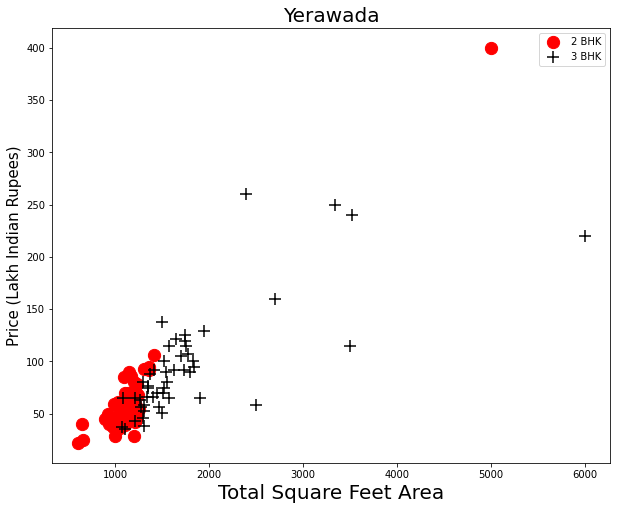

In [35]:
def plot_scatter (df,site_location):
    BHK2 = df[(df['site_location']==site_location) & (df['BHK']==2)]
    BHK3 = df[(df['site_location']==site_location) & (df['BHK']==3)]
    matplotlib.rcParams['figure.figsize'] = (10,8)
    plt.scatter(BHK2['total_sqft'],BHK2['price'],color='Red',label='2 BHK', s=150)
    plt.scatter(BHK3['total_sqft'],BHK3['price'],marker='+', color='Black',label='3 BHK', s=150)
    plt.xlabel("Total Square Feet Area",size=20)
    plt.ylabel("Price (Lakh Indian Rupees)",size=15)
    plt.title(site_location,size=20)
    plt.legend()
    
plot_scatter(df5,"Yerawada")

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('site_location'):
        bhk_stats = {}
        for BHK, bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
# df8 = df7.copy()
df6.shape

(7503, 7)

In [37]:
df6_test_one = pd.get_dummies(df6,columns=['area_type'], prefix = 'Type')
df7 = df6_test_one.copy()
df6_test_one

,total_sqft,bath,price,site_location,BHK,price_per_sqft,Type_Built-up Area,Type_Carpet Area,Type_Plot Area,Type_Super built-up Area
0,1056.0,2.00000,39.07,Alandi Road,2,3699.810606,0,0,0,1
1,2894.0,4.00000,245.00,Alandi Road,4,8465.791292,0,0,1,0
2,1084.0,2.00000,50.00,Alandi Road,2,4612.546125,0,0,0,1
3,1230.0,2.00000,80.00,Alandi Road,2,6504.065041,0,0,0,1
4,1750.0,3.00000,130.00,Alandi Road,3,7428.571429,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
11172,1165.0,2.00000,67.00,Yerawada,2,5751.072961,0,0,0,1
11174,3122.0,6.00000,250.00,Yerawada,4,8007.687380,0,0,0,1
11180,3210.0,2.69261,353.00,Yerawada,5,10996.884735,1,0,0,0
11181,1050.0,2.00000,54.00,Yerawada,2,5142.857143,0,0,0,1


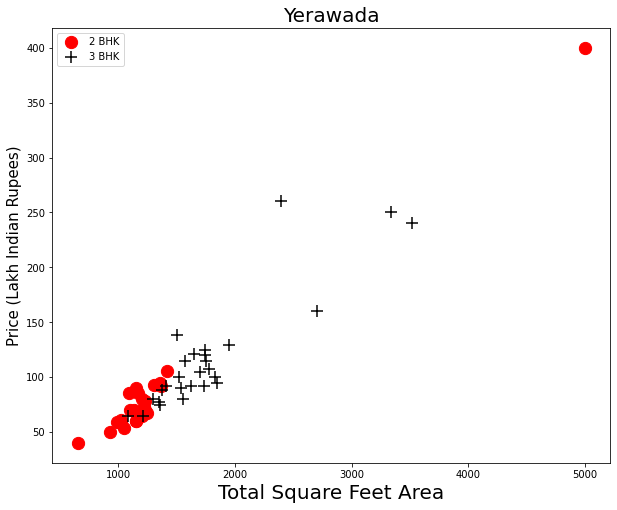

In [38]:
plot_scatter(df6,"Yerawada")

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

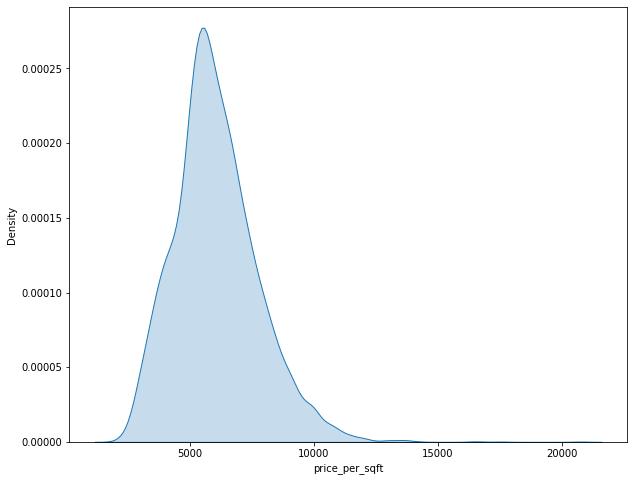

In [39]:
sns.kdeplot(df7['price_per_sqft'],fill=True)

In [40]:
df7


,total_sqft,bath,price,site_location,BHK,price_per_sqft,Type_Built-up Area,Type_Carpet Area,Type_Plot Area,Type_Super built-up Area
0,1056.0,2.00000,39.07,Alandi Road,2,3699.810606,0,0,0,1
1,2894.0,4.00000,245.00,Alandi Road,4,8465.791292,0,0,1,0
2,1084.0,2.00000,50.00,Alandi Road,2,4612.546125,0,0,0,1
3,1230.0,2.00000,80.00,Alandi Road,2,6504.065041,0,0,0,1
4,1750.0,3.00000,130.00,Alandi Road,3,7428.571429,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
11172,1165.0,2.00000,67.00,Yerawada,2,5751.072961,0,0,0,1
11174,3122.0,6.00000,250.00,Yerawada,4,8007.687380,0,0,0,1
11180,3210.0,2.69261,353.00,Yerawada,5,10996.884735,1,0,0,0
11181,1050.0,2.00000,54.00,Yerawada,2,5142.857143,0,0,0,1


In [41]:
df7['bath'].unique()

array([ 2.        ,  4.        ,  3.        ,  5.        ,  1.        ,
        6.        ,  8.        ,  2.69260965,  7.        , 10.        ,
        9.        , 12.        , 13.        , 16.        , 11.        ])

In [42]:
df7['bath'].value_counts()

2.00000     4111
3.00000     1892
1.00000      608
4.00000      526
5.00000      180
6.00000       90
2.69261       38
7.00000       22
8.00000       18
9.00000       11
10.00000       2
12.00000       2
13.00000       1
16.00000       1
11.00000       1
Name: bath, dtype: int64

In [43]:
df7[df7['bath']>df7['BHK']+1]

,total_sqft,bath,price,site_location,BHK,price_per_sqft,Type_Built-up Area,Type_Carpet Area,Type_Plot Area,Type_Super built-up Area
115,1799.0,6.00000,101.000,Alandi Road,3,5614.230128,1,0,0,0
137,3122.0,6.00000,245.000,Ambegaon Budruk,4,7847.533632,0,0,0,1
169,1150.0,6.00000,75.000,Ambegaon Budruk,3,6521.739130,0,0,1,0
198,3122.0,6.00000,245.000,Ambegaon Budruk,4,7847.533632,0,0,0,1
262,1200.0,8.00000,110.000,Anandnagar,3,9166.666667,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
10731,776.5,2.69261,48.145,Wakadewadi,1,6200.257566,0,0,0,1
10916,3450.0,7.00000,225.000,Wanowrie,3,6521.739130,0,0,1,0
10926,1200.0,6.00000,95.000,Wanowrie,3,7916.666667,0,0,1,0
11167,3520.0,5.00000,240.000,Yerawada,3,6818.181818,0,0,0,1


In [44]:
df8 = df7[df7['bath']<df7['BHK']+1]
df8.shape

(6923, 10)

In [49]:
dummies = pd.get_dummies(df8['site_location'])
dummies.head(3)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df9 = pd.concat([df8,dummies],axis='columns')
df9.head()

,total_sqft,bath,price,site_location,BHK,price_per_sqft,Type_Built-up Area,Type_Carpet Area,Type_Plot Area,Type_Super built-up Area,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,Alandi Road,2,3699.810606,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,Alandi Road,4,8465.791292,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,Alandi Road,2,4612.546125,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,Alandi Road,2,6504.065041,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,Alandi Road,3,7428.571429,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df10=df9.drop(['price_per_sqft','site_location'],axis='columns')
df10

,total_sqft,bath,price,BHK,Type_Built-up Area,Type_Carpet Area,Type_Plot Area,Type_Super built-up Area,Alandi Road,Ambegaon Budruk,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.00000,39.07,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.00000,245.00,4,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.00000,50.00,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.00000,80.00,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.00000,130.00,3,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11170,1355.0,2.00000,75.00,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11172,1165.0,2.00000,67.00,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11180,3210.0,2.69261,353.00,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11181,1050.0,2.00000,54.00,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
x = df10.drop('price',axis = 1)
y = df10['price']

In [53]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [54]:
x_test

,total_sqft,bath,BHK,Type_Built-up Area,Type_Carpet Area,Type_Plot Area,Type_Super built-up Area,Alandi Road,Ambegaon Budruk,Anandnagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
7879,1030.0,2.0,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1216,1120.0,2.0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1324,910.2,2.0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5325,1445.0,3.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7747,1200.0,2.0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8001,3335.0,4.0,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4359,1430.0,2.0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2208,1100.0,2.0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11100,550.0,1.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [56]:
y_pred = lr_model.predict(x_test)         #y_test   #x_test

MSE = mean_squared_error(y_test, y_pred)
print("Mean squared value is ",MSE)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error is ",MAE)


Mean squared value is  718.8864032212854
Mean Absolute Error is  16.844056313124373


In [57]:
lr_model.score(x_test,y_test)

0.8224497140828539